In [66]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df = df.drop(columns=["Cabin"])

df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.',expand=False)

df["Title"] = df["Title"].replace(["Lady", "Countess", "Capt", "Col", "Dr", "Don", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Others")

title_age_mean = df.groupby("Title")["Age"].mean()

df["Age"] = df["Age"].fillna(df["Title"].map(title_age_mean)) 

# print(df.to_string())

In [24]:
children = (df[df["Age"] <= 15])

# print(children)

In [21]:
survived = df[df["Survived"] == 1]

# print(survived)

In [22]:
female_survivors = df[(df["Sex"] == "female") & (df["Survived"] == 1)]

# print(female_survivors)

In [38]:
high_fare = (df[df["Fare"] >= 200])

# print(high_fare)

In [144]:
Average_age = df.groupby("Pclass")["Age"].mean()

# print(Average_age)

In [95]:
#Basic Code
# male_count = (df["Sex"] == "male").sum()
# male_survived = ((df["Sex"] == "male") & (df["Survived"] == 1)).sum()

# female_count = (df["Sex"] == "female").sum()
# female_survived = ((df["Sex"] == "female") & (df["Survived"] == 1)).sum()

# male_survival_rate = male_survived / male_count * 100
# female_survival_rate = female_survived / female_count * 100

# print(male_survival_rate)
# print(female_survival_rate)

#Logical Code
gender_survival = df.groupby("Sex")["Survived"].mean() * 100

# print(gender_survival)

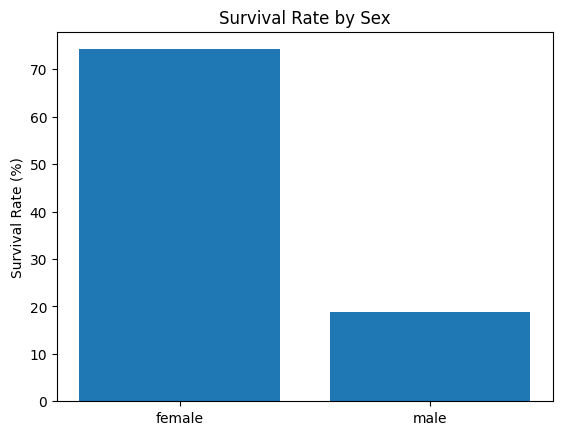

In [136]:
import matplotlib.pyplot as plt

plt.bar(gender_survival.index, gender_survival.values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sex")
plt.show()

In [97]:
#Basic Code
# High_class_count = (df["Pclass"] == 1).sum()
# High_class_survived = ((df["Pclass"] == 1) & (df["Survived"] == 1)).sum()

# High_class_survival_rate =  High_class_survived / High_class_count * 100 

# Middle_class_count = (df["Pclass"] == 2).sum()
# Middle_class_survived = ((df["Pclass"] == 2) & (df["Survived"] == 1)).sum()

# Middle_class_survival_rate =  Middle_class_survived / Middle_class_count * 100 

# Low_class_count = (df["Pclass"] == 3).sum()
# Low_class_survived = ((df["Pclass"] == 3) & (df["Survived"] == 1)).sum()

# Low_class_survival_rate =  Low_class_survived / Low_class_count * 100 

# print(High_class_survival_rate)
# print(Middle_class_survival_rate)
# print(Low_class_survival_rate)

#Logical Code
class_survival = df.groupby("Pclass")["Survived"].mean() * 100

# print(class_survival)

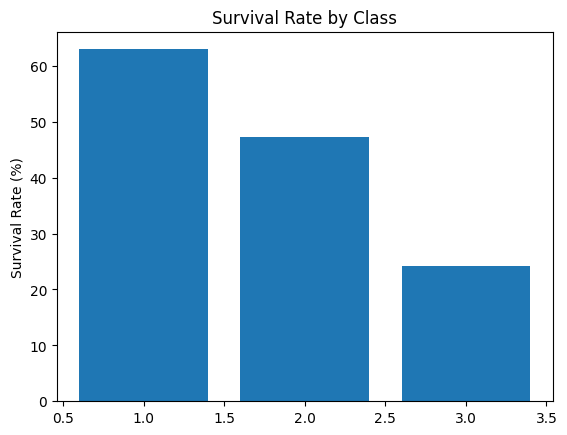

In [135]:
plt.bar(class_survival.index, class_survival.values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Class")
plt.show()

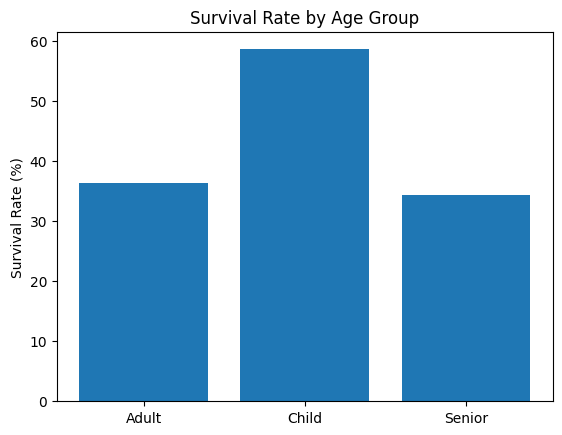

In [134]:
df.loc[df["Age"] <= 15, "AgeGroup"] = "Child"
df.loc[(df["Age"] > 15) & (df["Age"] <= 50) , "AgeGroup"] = "Adult"
df.loc[df["Age"] > 50, "AgeGroup"] = "Senior"
# print(df["AgeGroup"].to_string())

survival_rate_by_age = df.groupby("AgeGroup")["Survived"].mean() *100
# print(survival_rate_by_age)

plt.bar(survival_rate_by_age.index,survival_rate_by_age.values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Age Group")
plt.show()

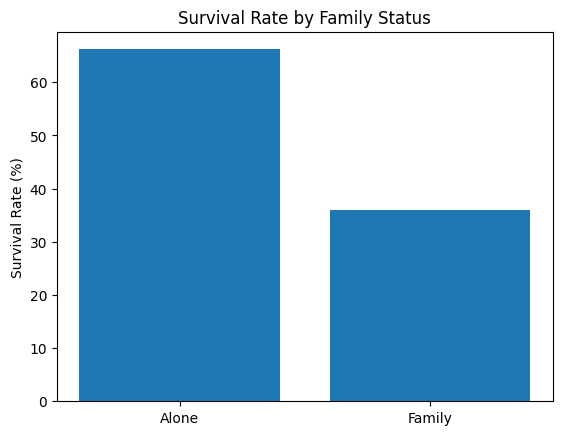

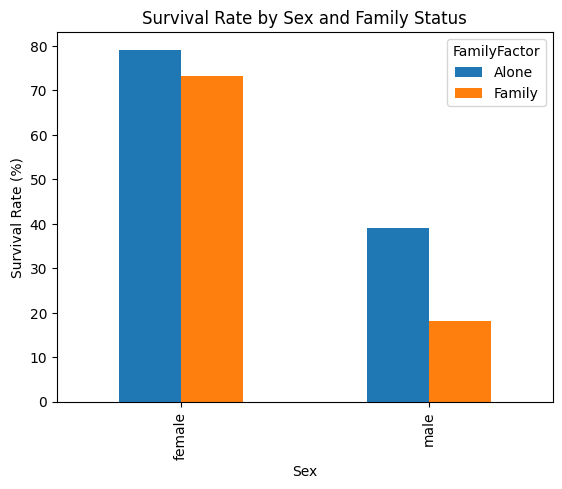

In [133]:
df.loc[(df["SibSp"]) == 0 & (df["Parch"] == 0), "FamilyFactor"] = "Alone"
df.loc[(df["SibSp"]) >= 1 & (df["Parch"] >= 1), "FamilyFactor"] = "Family"
# print(df["FamilyFactor"].to_string())

survival_rate_by_family = df.groupby("FamilyFactor")["Survived"].mean() * 100
# print(survival_rate_by_family)

survival_rate_by_family_and_sex = df.groupby(["Sex", "FamilyFactor"])["Survived"].mean() *100
# print(survival_rate_by_family_and_sex)

plt.bar(survival_rate_by_family.index, survival_rate_by_family.values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Status")
plt.show()


plot_data = survival_rate_by_family_and_sex.unstack()
plot_data.plot(kind="bar")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sex and Family Status")
plt.show()

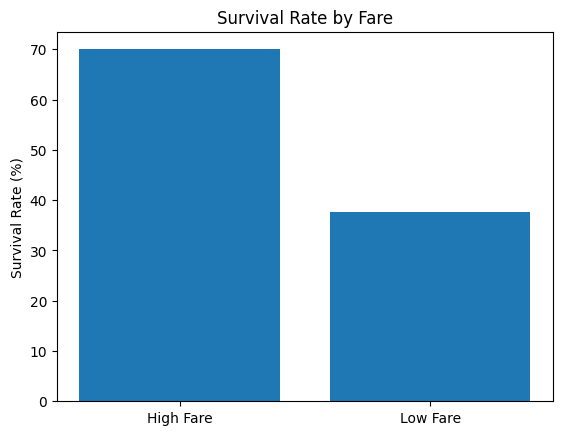

In [132]:
df.loc[df["Fare"] <= 200, "FareFactor"] = "Low Fare"
df.loc[df["Fare"] > 200, "FareFactor"] = "High Fare"
# print(df["FareFactor"].to_string())


survival_rate_by_fare = df.groupby("FareFactor")["Survived"].mean() *100
# print(survival_rate_by_fare)

plt.bar(survival_rate_by_fare.index, survival_rate_by_fare.values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Fare")
plt.show()